# Exercise

# Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

# For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta, datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import acquire as a
import prepare as p

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Acquire and Prepare Data
df = p.prepare_store_data()
df.head()

Data is cached. Reading from .csv files
Items data acquired...
Stores data acquired...
Sales data acquired...
Acquisition complete


,Unnamed: 0_x,sale_amount,sale_date,sale_id,Unnamed: 0_y,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,Unnamed: 0,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,0,13.0,2013-01-01 00:00:00+00:00,1,0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,0,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,Tuesday,10.92
2013-01-01 00:00:00+00:00,211816,26.0,2013-01-01 00:00:00+00:00,211817,11,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,6,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,1,Tuesday,218.40
2013-01-01 00:00:00+00:00,832656,27.0,2013-01-01 00:00:00+00:00,832657,45,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,6,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,1,Tuesday,125.55
2013-01-01 00:00:00+00:00,213642,54.0,2013-01-01 00:00:00+00:00,213643,11,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,7,15000 San Pedro Ave,San Antonio,8,TX,78232,1,Tuesday,453.60
2013-01-01 00:00:00+00:00,215468,35.0,2013-01-01 00:00:00+00:00,215469,11,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,8,735 SW Military Dr,San Antonio,9,TX,78221,1,Tuesday,294.00


In [3]:
# plotting defaults
plt.rc('figure', figsize = (14, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size = 16)

# Data Splitting

### Percentage - Based

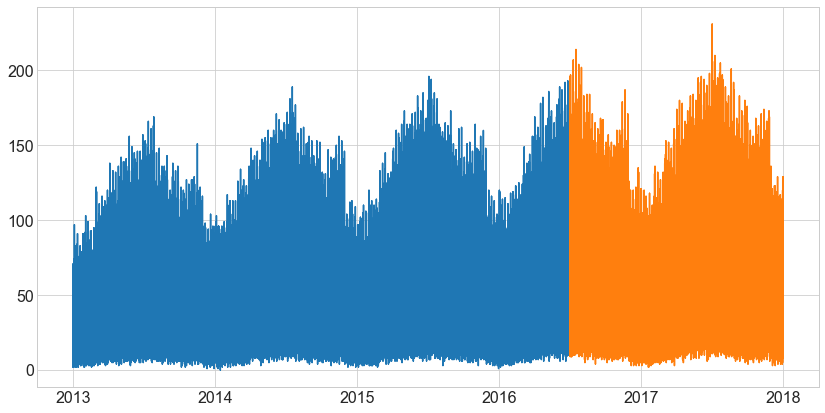

In [4]:
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.sale_amount)
plt.plot(test.index, test.sale_amount)
plt.show()

### Human-Based

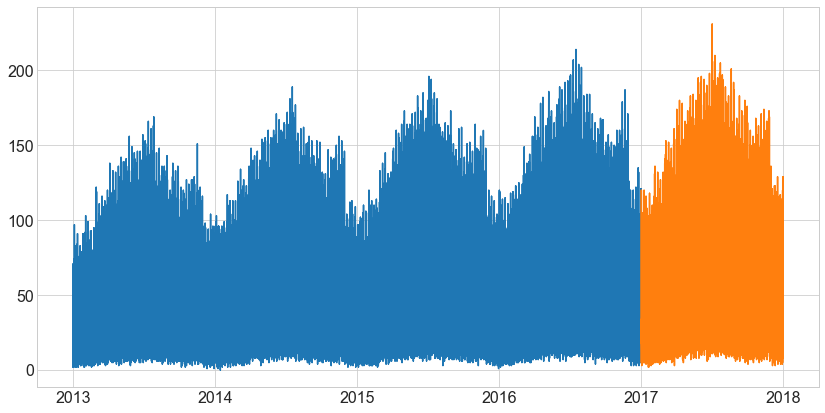

In [5]:
train = df[:'2016'] # includes 2016
test = df['2017']

plt.plot(train.index, train.sale_amount)
plt.plot(test.index, test.sale_amount)

### Visualizations

In [6]:
# We'll store our target in a variable named y for ease of access.
y = train.sale_amount
y.head()

sale_date
2013-01-01 00:00:00+00:00    13.0
2013-01-01 00:00:00+00:00    26.0
2013-01-01 00:00:00+00:00    27.0
2013-01-01 00:00:00+00:00    54.0
2013-01-01 00:00:00+00:00    35.0
Name: sale_amount, dtype: float64

<AxesSubplot:ylabel='Frequency'>

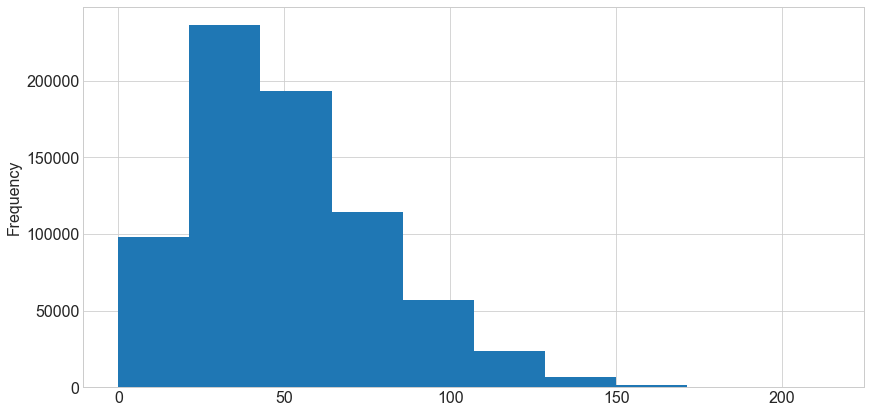

In [7]:
# Don't consider the time series
y.plot.hist()

[Text(0.5, 1.0, 'Average Temperature by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Temp (F)')]

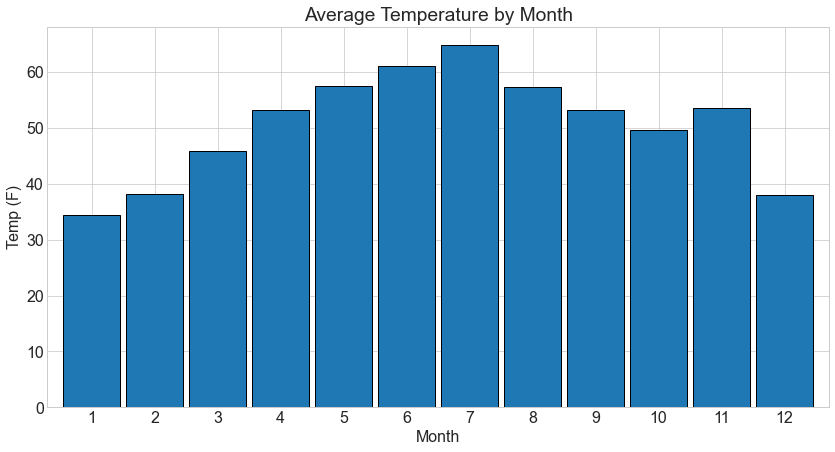

In [8]:
# We could also treat components of the date as a seperate categorical feature.
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Temperature by Month', xlabel='Month', ylabel='Temp (F)')


[Text(0.5, 1.0, 'Average Temperature by Weekday'),
 Text(0.5, 22.200000000000003, 'Weekday'),
 Text(22.200000000000017, 0.5, 'Temp (F)')]

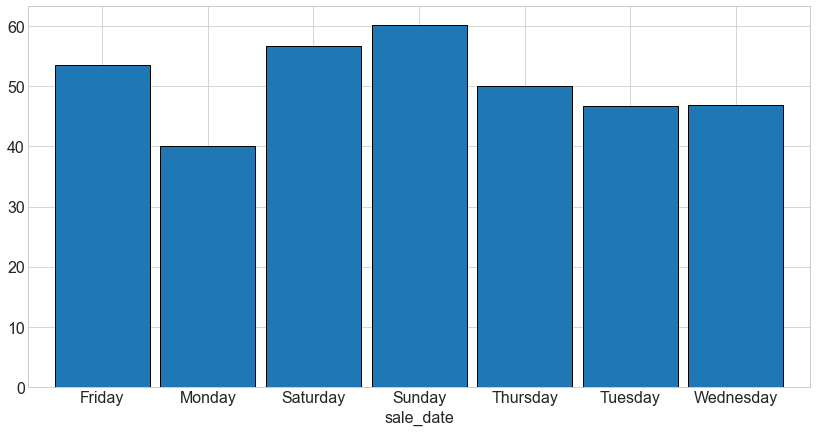

In [9]:
y.groupby(y.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Temperature by Weekday', xlabel='Weekday', ylabel='Temp (F)')


<AxesSubplot:xlabel='day_of_week', ylabel='sale_amount'>

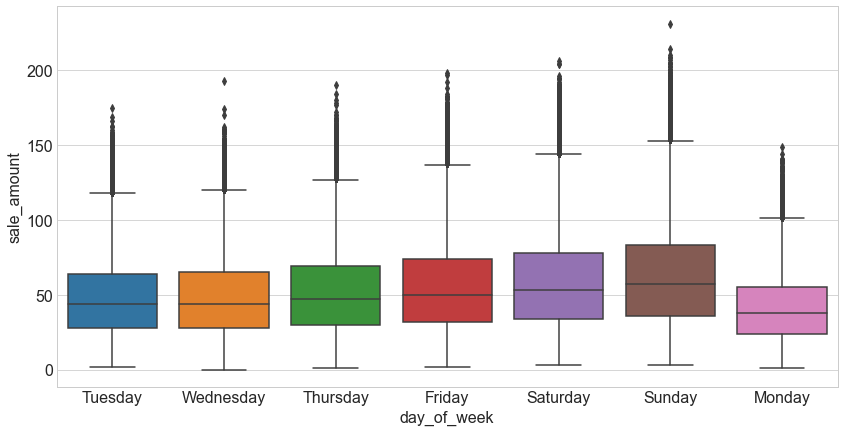

In [14]:
(
    y.reset_index()
    .assign(weekday=lambda df: df.sale_date.dt.day_name())
    .pipe((sns.boxplot, "data"), y= df.sale_amount, x= df.day_of_week)
)


### Visualize the target over time

<AxesSubplot:xlabel='sale_date'>

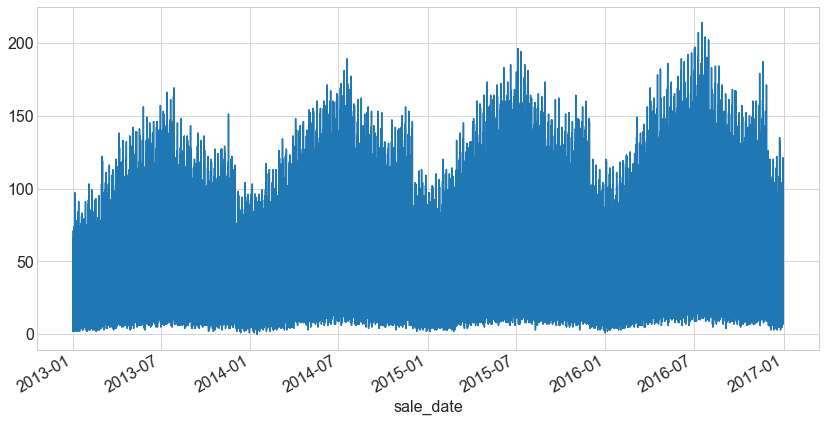

In [15]:
y.plot()

<AxesSubplot:title={'center':'Monthly Average'}, xlabel='sale_date'>

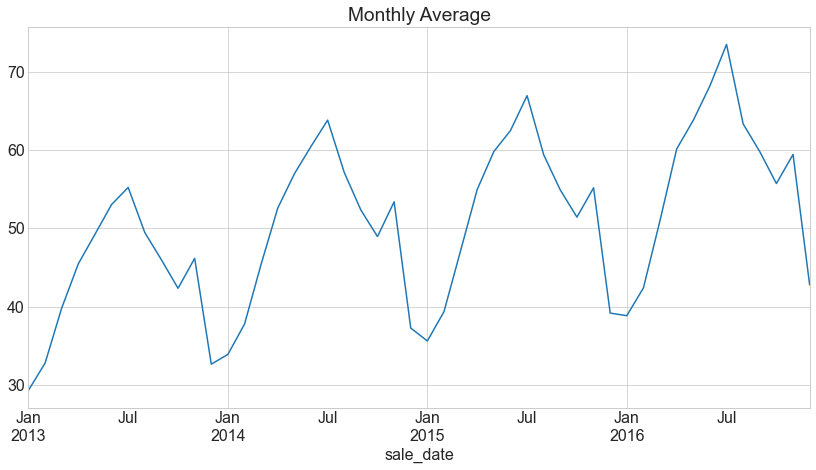

In [17]:
# We can also resample our target and visualize it over various time periods.
y.resample('M').mean().plot(title='Monthly Average')

<AxesSubplot:title={'center':'Weekly Average'}, xlabel='sale_date'>

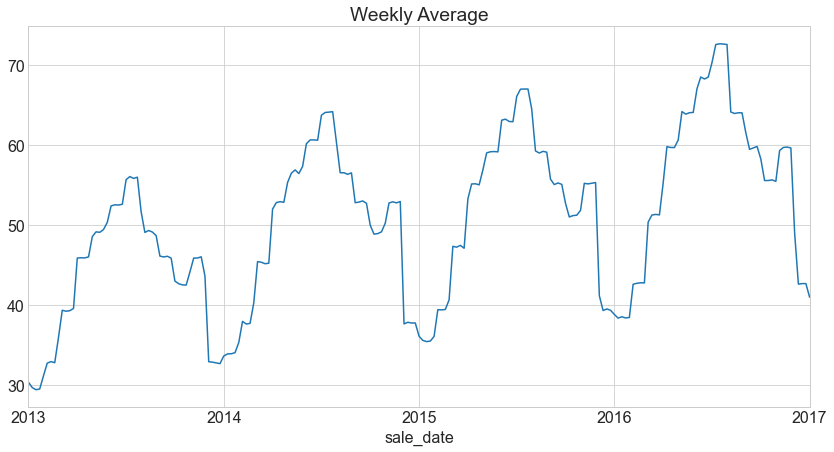

In [20]:
# We can also resample our target and visualize it over various time periods.
y.resample('W').mean().plot(title='Weekly Average')

<AxesSubplot:title={'center':'Yearly Average'}, xlabel='sale_date'>

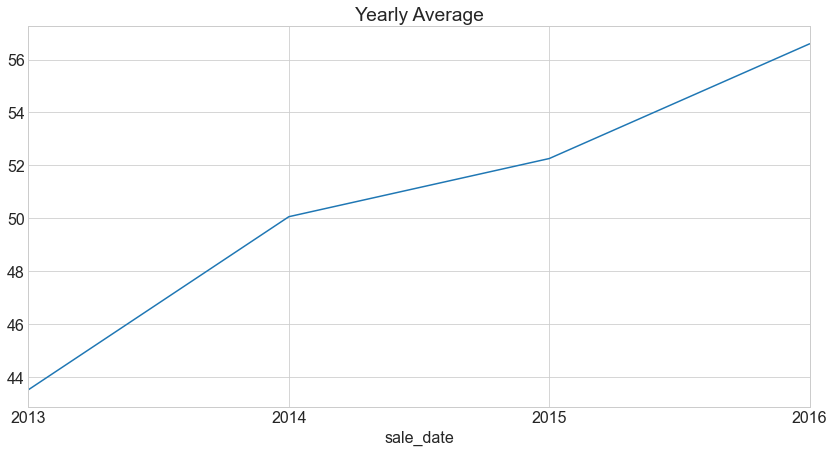

In [18]:
# We can also resample our target and visualize it over various time periods.
y.resample('Y').mean().plot(title='Yearly Average')

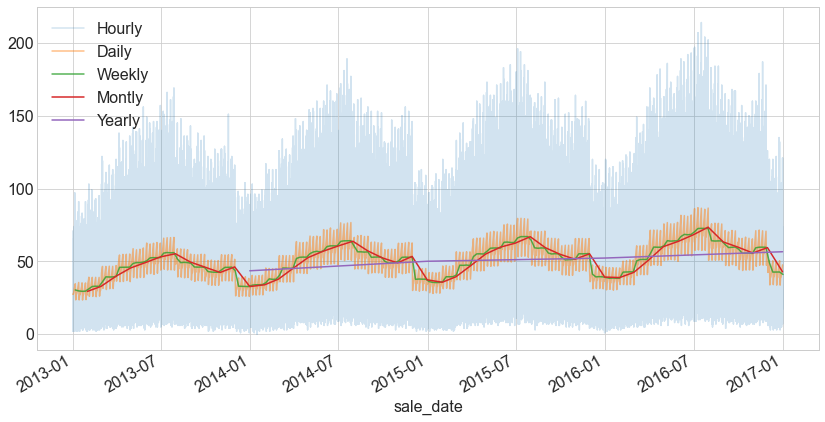

In [21]:
# We can combine these visualizations to see how the aggregating smoothes out the data.
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

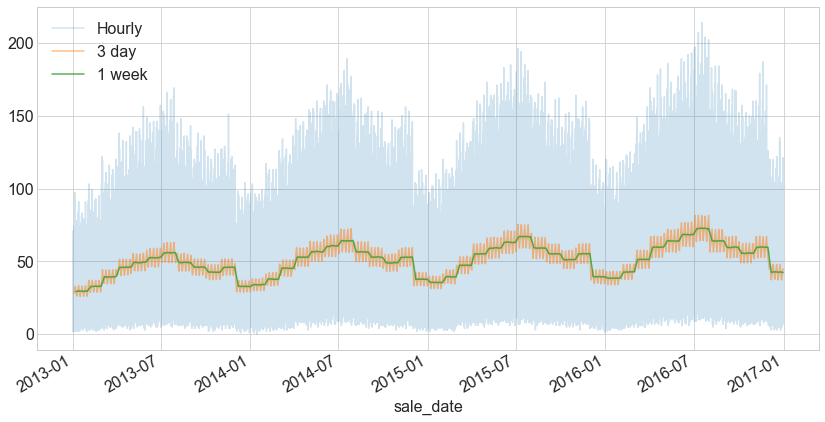

In [22]:
# In addition to resampling, we can calculate moving averages with the .rolling method.
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=.8, label='1 week')
plt.legend()


### Visualize change over time

<AxesSubplot:title={'center':'Average week-to-week change in sale amount'}, xlabel='sale_date'>

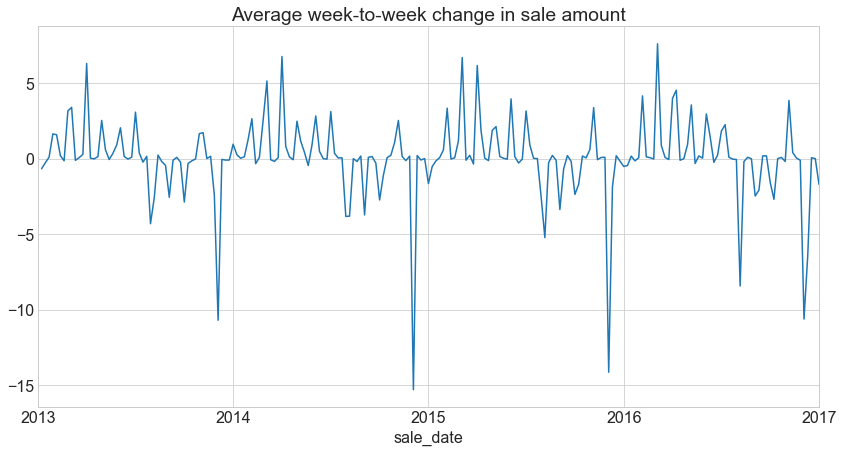

In [23]:
# We can use the .diff method to visualize the change in sale amount from one time period to the next.
y.resample('W').mean().diff().plot(title='Average week-to-week change in sale amount')


<AxesSubplot:title={'center':'Average month-to-month change in sale amount'}, xlabel='sale_date'>

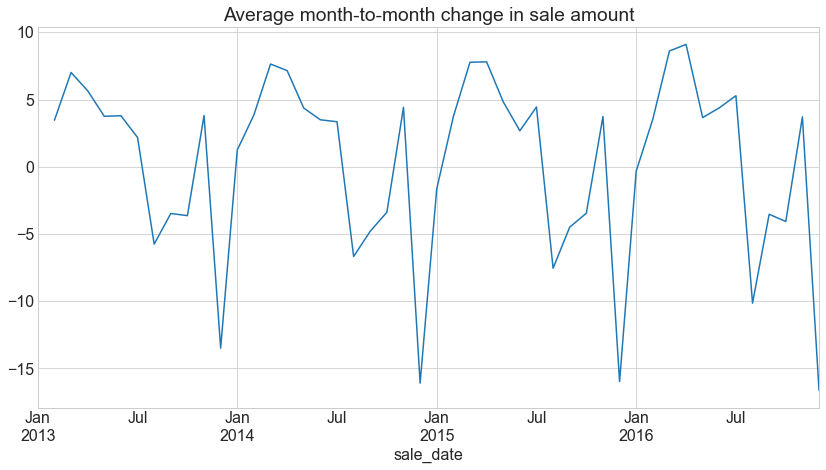

In [24]:
y.resample('M').mean().diff().plot(title='Average month-to-month change in sale amount')


### Seasonal Plot

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='sale_date'>

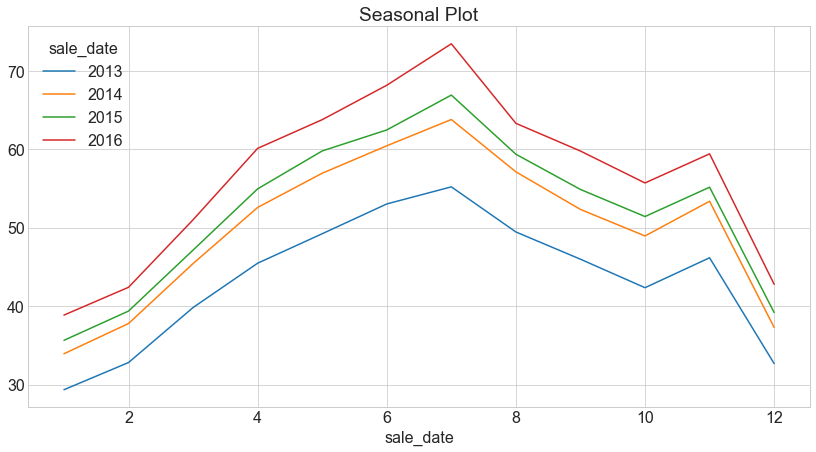

In [25]:
# .unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

### Seasonal Subseries Plot

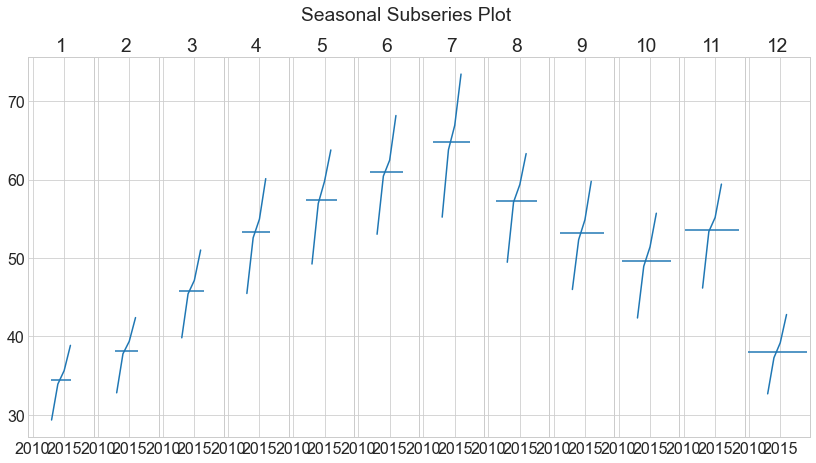

In [26]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)


### Lag Plot

Text(0.5, 1.0, 'Lag plot with lag=1')

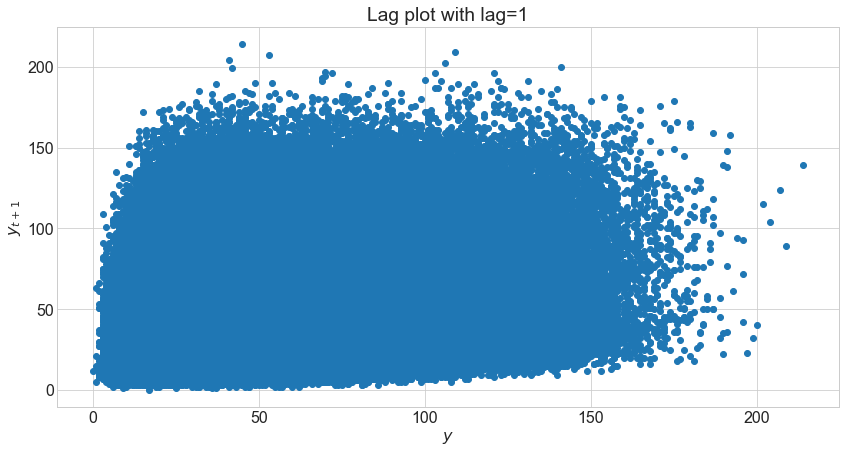

In [27]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')


[Text(0.5, 0, 't'), Text(0, 0.5, 't + 1')]

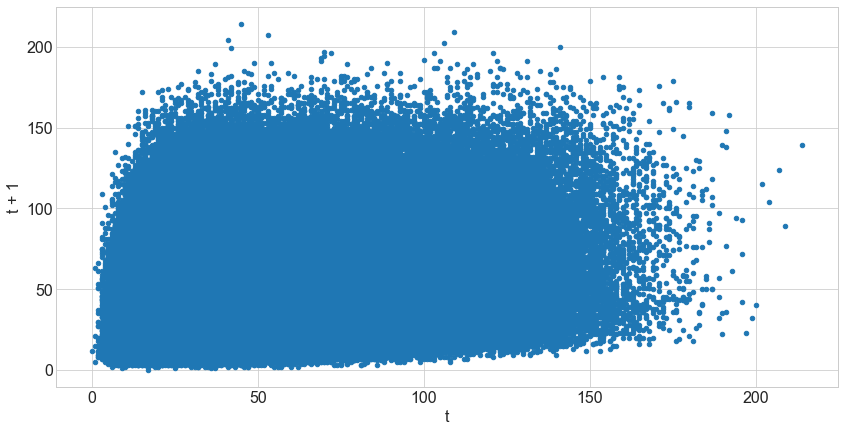

In [31]:
train['y(t + 1)'] = train.sale_amount.shift(-1)
ax = train.plot.scatter(x='sale_amount', y='y(t + 1)')
ax.set(xlabel='t', ylabel='t + 1')

,Unnamed: 0_x,this_week,sale_id,Unnamed: 0_y,item_id,item_price,item_upc12,item_upc14,Unnamed: 0,store_id,store_zipcode,month,sales_total,y(t + 1),the_next_week
sale_date,,,,,,,,,,,,,,,
2013-01-06 00:00:00+00:00,455589.5,30.355667,455590.5,24.5,25.5,5.1604,2.384688e+11,2.384688e+11,4.5,5.5,78224.8,1.000000,163.589167,30.359667,29.686286
2013-01-13 00:00:00+00:00,455596.0,29.686286,455597.0,24.5,25.5,5.1604,2.384688e+11,2.384688e+11,4.5,5.5,78224.8,1.000000,159.981203,29.684857,29.414286
2013-01-20 00:00:00+00:00,455603.0,29.414286,455604.0,24.5,25.5,5.1604,2.384688e+11,2.384688e+11,4.5,5.5,78224.8,1.000000,157.946720,29.412571,29.513714
2013-01-27 00:00:00+00:00,455610.0,29.513714,455611.0,24.5,25.5,5.1604,2.384688e+11,2.384688e+11,4.5,5.5,78224.8,1.000000,158.545383,29.515714,31.150571
2013-02-03 00:00:00+00:00,455617.0,31.150571,455618.0,24.5,25.5,5.1604,2.384688e+11,2.384688e+11,4.5,5.5,78224.8,1.428571,167.585014,31.150571,32.733143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-04 00:00:00+00:00,457017.0,49.016857,457018.0,24.5,25.5,5.1604,2.384688e+11,2.384688e+11,4.5,5.5,78224.8,11.571429,263.768997,49.010857,42.618571
2016-12-11 00:00:00+00:00,457024.0,42.618571,457025.0,24.5,25.5,5.1604,2.384688e+11,2.384688e+11,4.5,5.5,78224.8,12.000000,228.559894,42.616571,42.682286
2016-12-18 00:00:00+00:00,457031.0,42.682286,457032.0,24.5,25.5,5.1604,2.384688e+11,2.384688e+11,4.5,5.5,78224.8,12.000000,229.298643,42.683429,42.680286


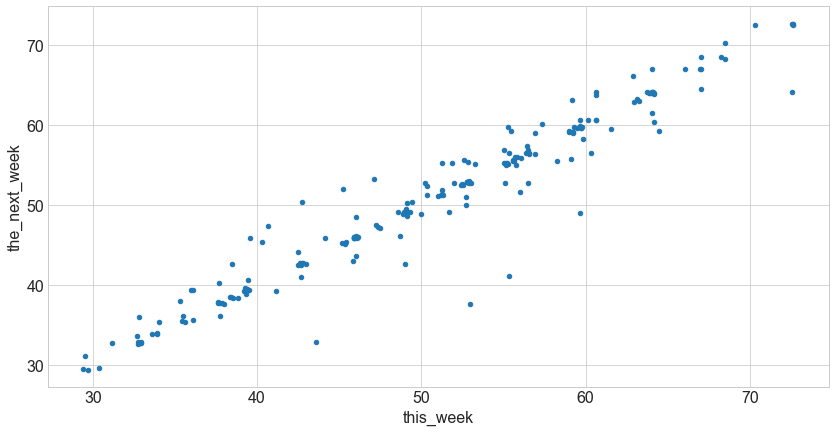

In [34]:
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.sale_amount.shift(-1)
weekly = weekly.rename(columns={'sale_amount': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
weekly

,Unnamed: 0_x,this_week,sale_id,Unnamed: 0_y,item_id,item_price,item_upc12,item_upc14,Unnamed: 0,store_id,store_zipcode,month,sales_total,y(t + 1),12_weeks_out
sale_date,,,,,,,,,,,,,,,
2013-01-06 00:00:00+00:00,455589.5,30.355667,455590.5,24.5,25.5,5.1604,2.384688e+11,2.384688e+11,4.5,5.5,78224.8,1.000000,163.589167,30.359667,39.575143
2013-01-13 00:00:00+00:00,455596.0,29.686286,455597.0,24.5,25.5,5.1604,2.384688e+11,2.384688e+11,4.5,5.5,78224.8,1.000000,159.981203,29.684857,45.875143
2013-01-20 00:00:00+00:00,455603.0,29.414286,455604.0,24.5,25.5,5.1604,2.384688e+11,2.384688e+11,4.5,5.5,78224.8,1.000000,157.946720,29.412571,45.909429
2013-01-27 00:00:00+00:00,455610.0,29.513714,455611.0,24.5,25.5,5.1604,2.384688e+11,2.384688e+11,4.5,5.5,78224.8,1.000000,158.545383,29.515714,45.892286
2013-02-03 00:00:00+00:00,455617.0,31.150571,455618.0,24.5,25.5,5.1604,2.384688e+11,2.384688e+11,4.5,5.5,78224.8,1.428571,167.585014,31.150571,46.023143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-04 00:00:00+00:00,457017.0,49.016857,457018.0,24.5,25.5,5.1604,2.384688e+11,2.384688e+11,4.5,5.5,78224.8,11.571429,263.768997,49.010857,NaN
2016-12-11 00:00:00+00:00,457024.0,42.618571,457025.0,24.5,25.5,5.1604,2.384688e+11,2.384688e+11,4.5,5.5,78224.8,12.000000,228.559894,42.616571,NaN
2016-12-18 00:00:00+00:00,457031.0,42.682286,457032.0,24.5,25.5,5.1604,2.384688e+11,2.384688e+11,4.5,5.5,78224.8,12.000000,229.298643,42.683429,NaN


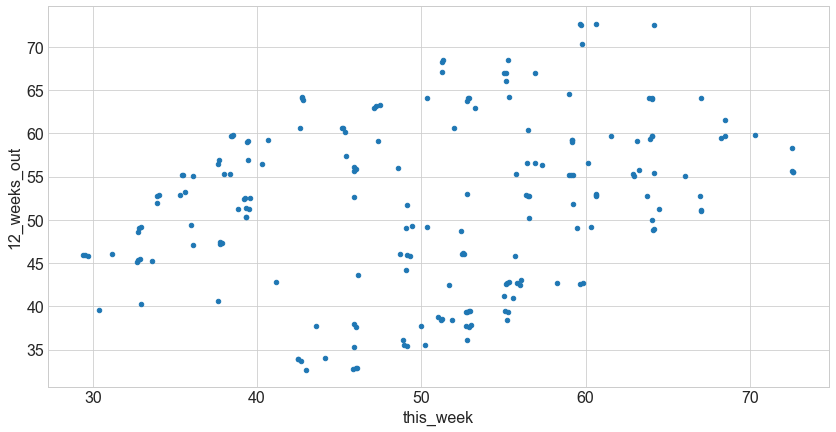

In [35]:
weekly = train.resample('W').mean()
weekly['12_weeks_out'] = weekly.sale_amount.shift(-12)
weekly = weekly.rename(columns={'sale_amount': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out')
weekly


,Unnamed: 0_x,this_week,sale_id,Unnamed: 0_y,item_id,item_price,item_upc12,item_upc14,Unnamed: 0,store_id,store_zipcode,month,sales_total,y(t + 1),half_a_year_later
sale_date,,,,,,,,,,,,,,,
2013-01-06 00:00:00+00:00,455589.5,30.355667,455590.5,24.5,25.5,5.1604,2.384688e+11,2.384688e+11,4.5,5.5,78224.8,1.000000,163.589167,30.359667,55.677429
2013-01-13 00:00:00+00:00,455596.0,29.686286,455597.0,24.5,25.5,5.1604,2.384688e+11,2.384688e+11,4.5,5.5,78224.8,1.000000,159.981203,29.684857,56.060857
2013-01-20 00:00:00+00:00,455603.0,29.414286,455604.0,24.5,25.5,5.1604,2.384688e+11,2.384688e+11,4.5,5.5,78224.8,1.000000,157.946720,29.412571,55.832000
2013-01-27 00:00:00+00:00,455610.0,29.513714,455611.0,24.5,25.5,5.1604,2.384688e+11,2.384688e+11,4.5,5.5,78224.8,1.000000,158.545383,29.515714,55.983429
2013-02-03 00:00:00+00:00,455617.0,31.150571,455618.0,24.5,25.5,5.1604,2.384688e+11,2.384688e+11,4.5,5.5,78224.8,1.428571,167.585014,31.150571,51.674857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-04 00:00:00+00:00,457017.0,49.016857,457018.0,24.5,25.5,5.1604,2.384688e+11,2.384688e+11,4.5,5.5,78224.8,11.571429,263.768997,49.010857,NaN
2016-12-11 00:00:00+00:00,457024.0,42.618571,457025.0,24.5,25.5,5.1604,2.384688e+11,2.384688e+11,4.5,5.5,78224.8,12.000000,228.559894,42.616571,NaN
2016-12-18 00:00:00+00:00,457031.0,42.682286,457032.0,24.5,25.5,5.1604,2.384688e+11,2.384688e+11,4.5,5.5,78224.8,12.000000,229.298643,42.683429,NaN


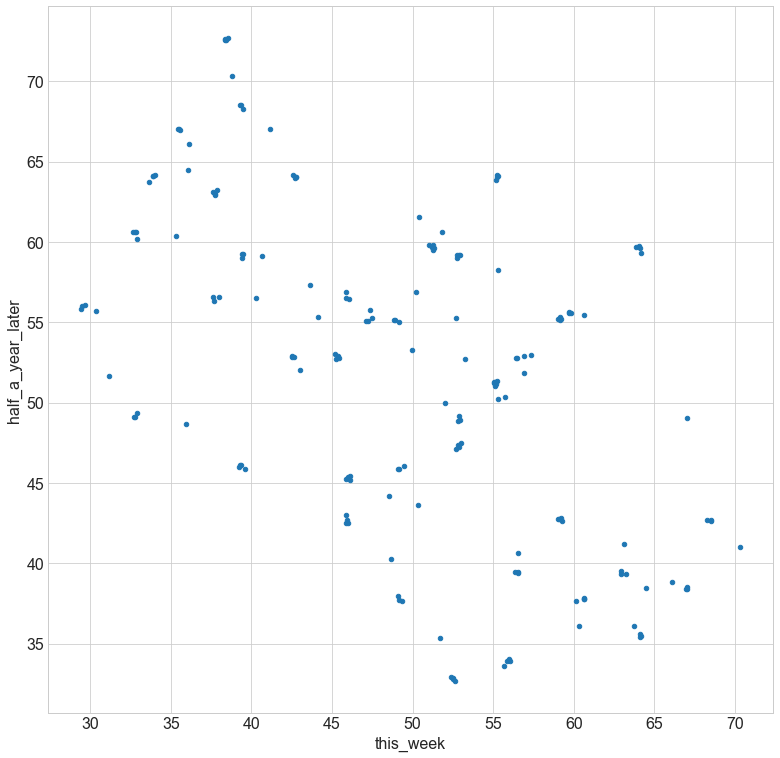

In [36]:
weekly = train.resample('W').mean()
weekly['half_a_year_later'] = weekly.sale_amount.shift(-26)
weekly = weekly.rename(columns={'sale_amount': 'this_week'})
weekly.plot.scatter(x='this_week', y='half_a_year_later', figsize=(13, 13))
weekly


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 26)'>

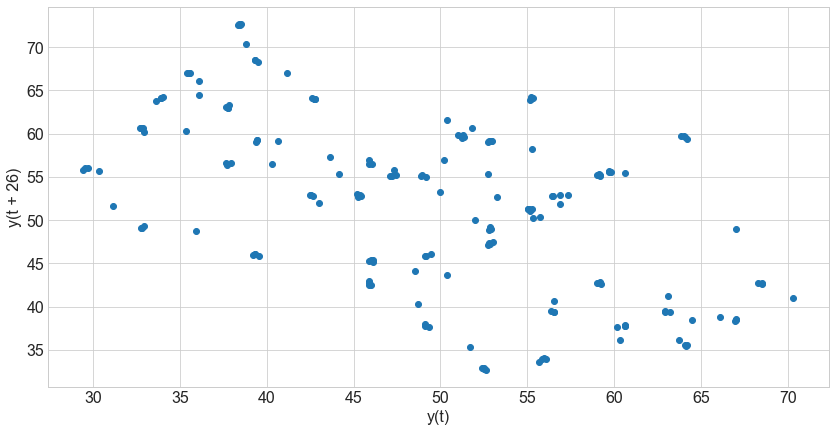

In [38]:
pd.plotting.lag_plot(train.sale_amount.resample('W').mean(), lag=26)

### Autocorrelation Plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

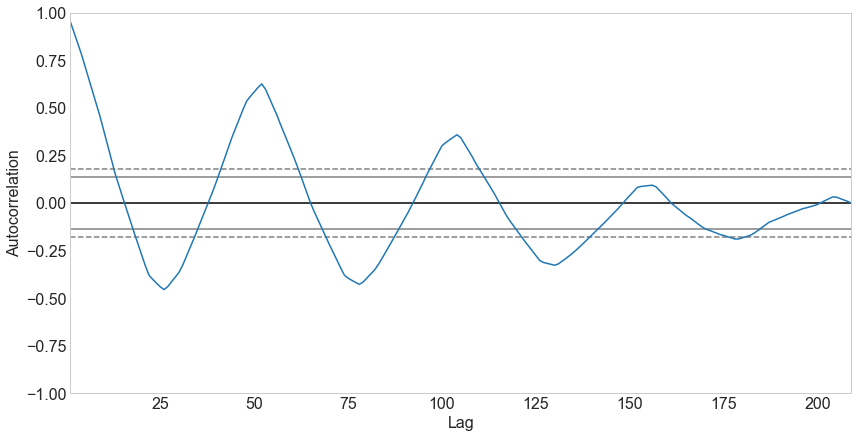

In [39]:
pd.plotting.autocorrelation_plot(train.sale_amount.resample('W').mean())

### Seasonal Decomposition

In [41]:
# We can use the seasonal_decompose function from the statsmodels library to perform this decomposition.
y = train.sale_amount.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-06 00:00:00+00:00,30.355667,NaN,-14.406312,NaN
2013-01-13 00:00:00+00:00,29.686286,NaN,-14.747474,NaN
2013-01-20 00:00:00+00:00,29.414286,NaN,-14.840886,NaN
2013-01-27 00:00:00+00:00,29.513714,NaN,-14.931698,NaN
2013-02-03 00:00:00+00:00,31.150571,NaN,-14.412598,NaN


<AxesSubplot:xlabel='sale_date'>

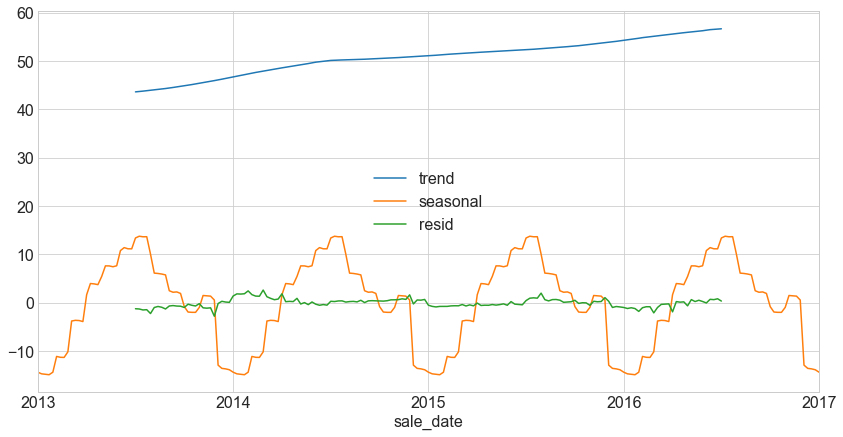

In [42]:
decomposition.iloc[:, 1:].plot()

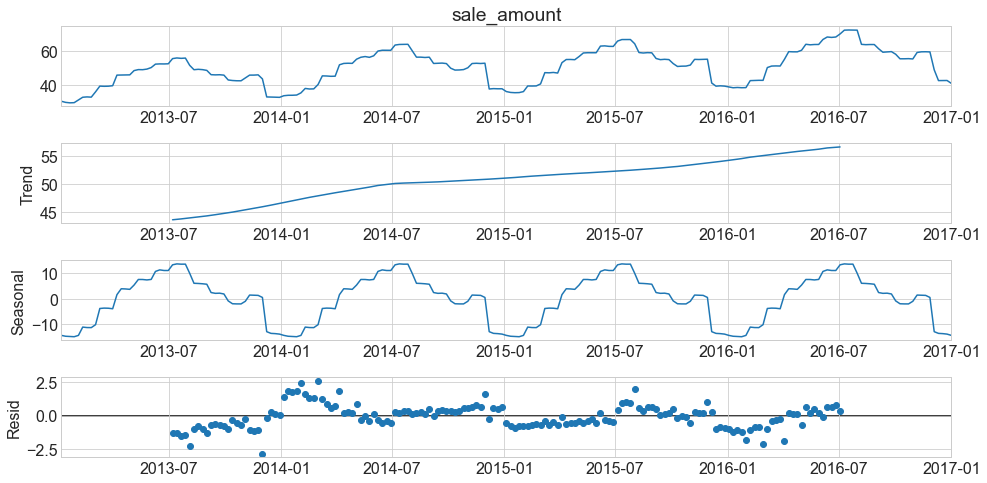

In [43]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()
None

### Categories over time

In [44]:
# How can we visualize categories over time?
train = train.resample('D').mean()
# create a categorical feature
train['temp_bin'] = pd.qcut(train.sale_amount, 4, labels=['high low', 'low', 'Mid', 'Up'])
train.groupby('temp_bin').mean()


,Unnamed: 0_x,sale_amount,sale_id,Unnamed: 0_y,item_id,item_price,item_upc12,item_upc14,Unnamed: 0,store_id,store_zipcode,month,sales_total,y(t + 1)
temp_bin,,,,,,,,,,,,,,
high low,456119.721311,35.242262,456120.721311,24.5,25.5,5.1604,2.384688e+11,2.384688e+11,4.5,5.5,78224.8,5.090164,189.487351,35.246175
low,456249.172603,45.930373,456250.172603,24.5,25.5,5.1604,2.384688e+11,2.384688e+11,4.5,5.5,78224.8,6.761644,246.934608,45.937171
Mid,456354.873973,54.626455,456355.873973,24.5,25.5,5.1604,2.384688e+11,2.384688e+11,4.5,5.5,78224.8,7.208219,293.705761,54.625847
Up,456544.772603,66.683929,456545.772603,24.5,25.5,5.1604,2.384688e+11,2.384688e+11,4.5,5.5,78224.8,7.035616,358.468900,66.674005


Text(0, 0.5, '% of days in the month')

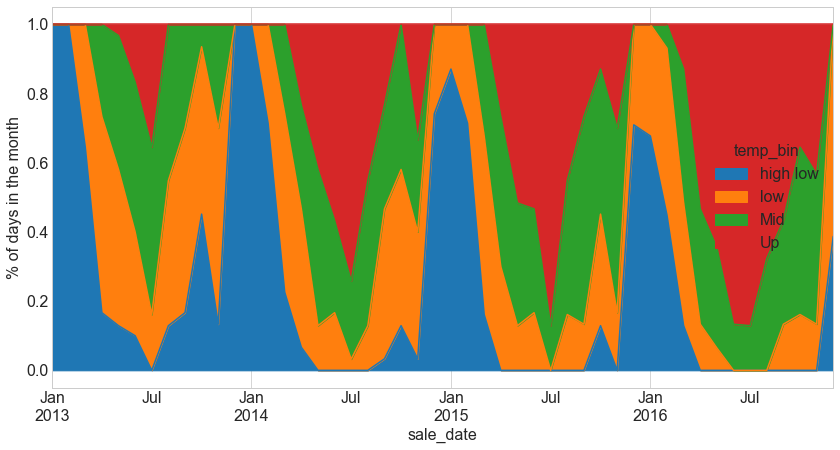

In [45]:
# How is the distribution of temp_bin changing over time?
(train.groupby('temp_bin')
 .resample('M')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area()
)
plt.ylabel('% of days in the month')


[Text(0, 0, 'January'),
 Text(1, 0, 'February'),
 Text(2, 0, 'March'),
 Text(3, 0, 'April'),
 Text(4, 0, 'May'),
 Text(5, 0, 'June'),
 Text(6, 0, 'July'),
 Text(7, 0, 'August'),
 Text(8, 0, 'September'),
 Text(9, 0, 'October'),
 Text(10, 0, 'November'),
 Text(11, 0, 'December')]

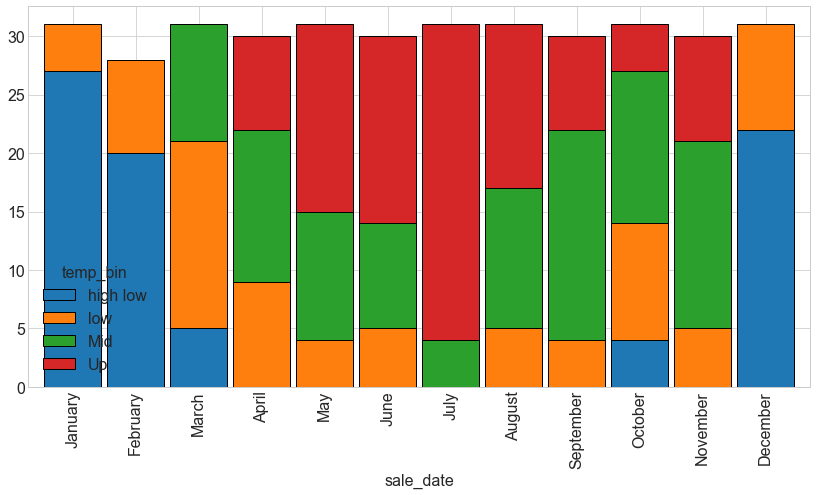

In [46]:
ax = (train['2015']
 .groupby('temp_bin')
 .resample('M')
 .size()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black')
)
labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels)


### strftime

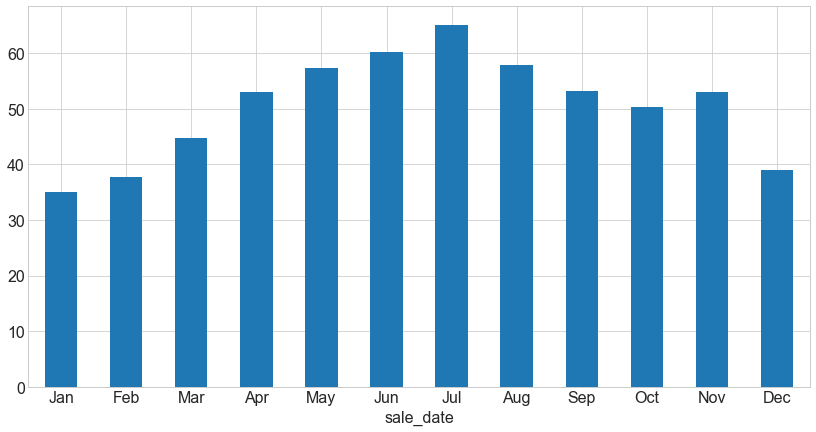

In [47]:
ax = y.groupby(y.index.strftime('%m-%b')).mean().plot.bar()
ax.set_xticklabels([t.get_text()[3:] for t in ax.get_xticklabels()], rotation=0)
None

### Matplotlib Dates

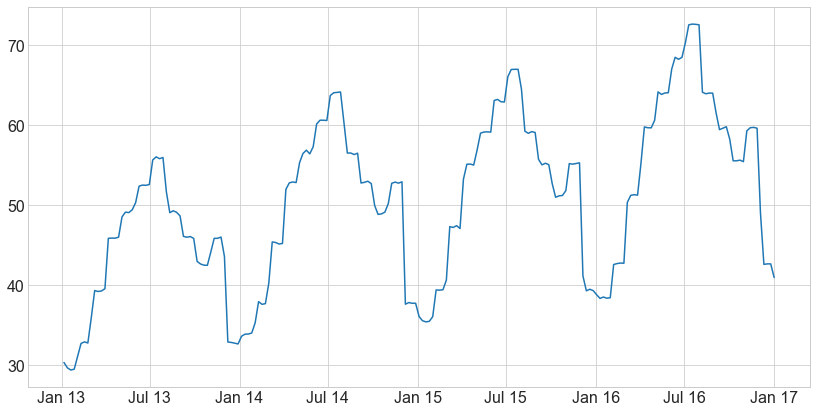

In [48]:
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots()

weekly = y.resample('W').mean()

ax.plot(weekly.index, weekly)

ax.xaxis.set_major_formatter(DateFormatter('%b %y'))
